In [14]:
#Released between 2018-01-01 and 2018-12-31 (Sorted by Number of Votes Descending)

In [7]:
from requests import get
url='https://www.imdb.com/search/title?release_date=2018&sort=num_votes,desc&page=1'
response=get(url)
#print(response.text[:500])

In [10]:
from bs4 import BeautifulSoup
html_soup=BeautifulSoup(response.text,'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [12]:
movie_containers=html_soup.find_all('div',class_='lister-item mode-advanced')
print len(movie_containers)
print type(movie_containers)

50
<class 'bs4.element.ResultSet'>


In [13]:
##first_movie

In [15]:
first_movie=movie_containers[0]

In [17]:
#first_movie

In [22]:
#first_movie.div
#first_movie.h3
first_movie.h3.a

<a href="/title/tt4154756/?ref_=adv_li_tt">Avengers: Infinity War</a>

In [23]:
first_movie.h3.a.text

u'Avengers: Infinity War'

In [29]:
first_year=first_movie.h3.find('span',class_='lister-item-year text-muted unbold')
first_year.text

u'(2018)'

In [32]:
first_movie.strong
first_movie.strong.text

u'8.5'

In [34]:
first_imbd=float(first_movie.strong.text)
first_imbd

8.5

In [75]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')

first_mscore = int(first_mscore.text)
print(first_mscore)

68


In [87]:
first_votes=first_movie.find('span',attrs={'name':'nv'})
print(first_votes)

<span data-value="565951" name="nv">565,951</span>


In [88]:
first_votes['data-value']

u'565951'

In [90]:
first_votes=int(first_votes['data-value'])
print(first_votes)

565951


In [107]:
names=[]
years=[]
imdb_ratings=[]
metascores=[]
votes=[]


In [133]:
for container in movie_containers:
    if container.find('div',class_='ratings-metascore')is not None:
        #name
        name=container.h3.a.text
        names.append(name)
        #Year
        year=container.h3.find('span',class_='lister-item-year').text
        years.append(year)
        #imdb_Rating
        imdb=float(container.strong.text)
        imdb_ratings.append(imdb)
        #metascore
        m_score=container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
        # The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))
        
        
        
        

In [134]:
vote

u'51822'

In [165]:
import pandas as pd

test_df = pd.DataFrame({'Movie': names,
                       'Year': years,
                       'IMDb': imdb_ratings,
                       'Metascore': metascores,
                       'Votes': votes})
print(test_df.info())
test_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
IMDb         94 non-null float64
Metascore    94 non-null int64
Movie        94 non-null object
Votes        94 non-null int64
Year         94 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 3.7+ KB
None


,IMDb,Metascore,Movie,Votes,Year
0,8.5,68,Avengers: Infinity War,565951,(2018)
1,7.4,88,Black Panther,442281,(2018)
2,7.8,66,Deadpool 2,333358,(2018)
3,7.5,64,Ready Player One,265482,(2018)
4,7.6,82,A Quiet Place,257273,(2018)
5,6.8,35,Venom,210389,(2018)
6,7.8,86,Mission: Impossible - Fallout,204365,(2018)
7,6.9,79,Annihilation,200356,(2018)
8,7.0,62,Solo: A Star Wars Story,191673,(2018)
9,6.2,51,Jurassic World: Fallen Kingdom,191076,(2018)


In [139]:
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [140]:
plt.rcParams['figure.figsize'] = 9,4

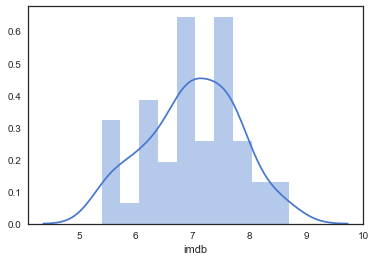

In [157]:
vis1=sns.distplot(test_df["imdb"],bins=10)

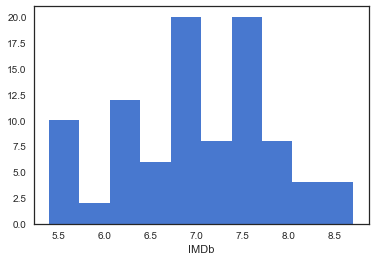

In [162]:
plt.hist(test_df['imdb'])
_ = plt.xlabel('IMDb')


In [166]:
#for more than 1 pages

In [167]:
names=[]
years=[]
imdb_ratings=[]
metascores=[]
votes=[]

In [171]:
from time import time
from random import randint

In [172]:
#Monitoring of loop
start_time=time()
requets=0

In [ ]:
for year_url in years_url:
    for pages in page:
        response = get('https://www.imdb.com/search/title?release_date='+year_url+&sort=num_votes,desc&page='+page,headers=headers)
                       sleep(randint(8,15))
                       requests=+1
        
